# Exercises - Decision Tree

Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [33]:

import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import env

def get_connection(db, username=env.username, host=env.host, password=env.password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

def get_titanic():
    my_query="SELECT * FROM passengers"
    titanic = pd.read_sql(my_query, get_connection('titanic_db'))
    return titanic

titanic = get_titanic()
titanic.head(2)



,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [3]:
titanic.survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
def prep_titanic(df):
    
    cols_to_drop = ['deck', 'embarked', 'class', 'age']
    titanic = df.drop(columns=cols_to_drop)
    dummy_titanic = pd.get_dummies(titanic[['sex','embark_town']], dummy_na=False, drop_first=[True, True])
    titanic = pd.concat([titanic, dummy_titanic], axis=1)
    titanic.dropna()
    return titanic

In [6]:
titanic = prep_titanic(titanic)

In [7]:
def train_val_test(df, target, seed=42):
    
    train, val_test = train_test_split(df, train_size=0.7, random_state=seed, stratify=df[target])
    
    val, test = train_test_split(val_test, train_size=0.5, random_state=seed, stratify=val_test[target])
    
    return train, val, test

In [8]:
train, val, test = train_val_test(titanic, 'survived')
train.shape, val.shape, test.shape

((623, 12), (134, 12), (134, 12))

In [9]:
cols_to_drop = ['sex', 'embark_town']
train = train.drop(columns=cols_to_drop)

In [10]:

val = val.drop(columns=cols_to_drop)

In [11]:
test = test.drop(columns=cols_to_drop)


In [12]:
X_train = train.drop(columns=['survived'])
y_train = train['survived']

X_val = val.drop(columns=['survived'])
y_val = val['survived']

X_test = test.drop(columns=['survived'])
y_test = test['survived']

In [13]:
X_train.shape, y_train.shape

((623, 9), (623,))

In [14]:
y_train.value_counts()

0    384
1    239
Name: survived, dtype: int64

In [15]:
y_train.shape
y_train.tail()

476    0
190    1
736    0
462    0
136    1
Name: survived, dtype: int64

In [16]:
seed = 42
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [18]:
seed = 42
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

In [29]:
clf = clf.fit(X_train, y_train)

In [31]:
accuracy = clf.score(X_train, y_train)
accuracy

0.9004815409309791

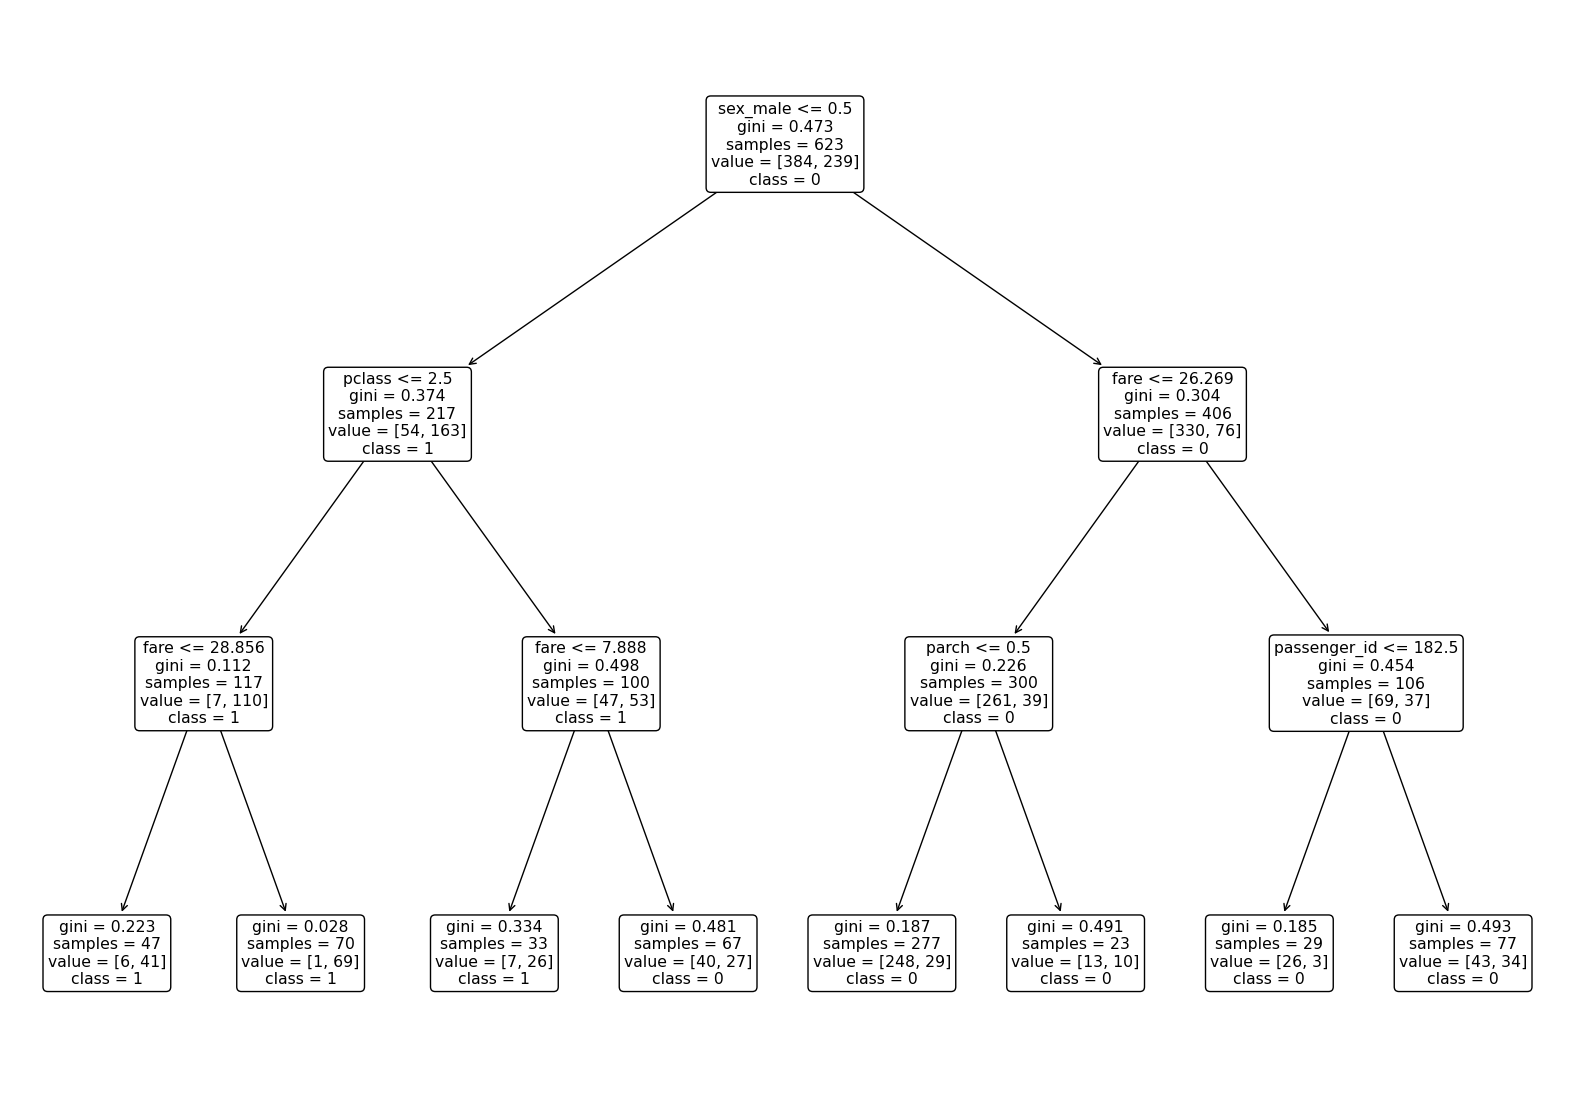

In [20]:
plt.figure(figsize=(20, 14))

plot_tree(clf, feature_names=X_train.columns, class_names=np.array(clf.classes_).astype('str').tolist(), rounded=True)

plt.show()

In [28]:
val_preds = clf.predict(X_val)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [32]:
plot_confusion_matrix(clf, X_train, y_train)

NameError: name 'plot_confusion_matrix' is not defined

In [26]:
val_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1])

In [24]:
y_train

748    0
45     0
28     1
633    0
403    0
      ..
476    0
190    1
736    0
462    0
136    1
Name: survived, Length: 623, dtype: int64

In [27]:
pd.crosstab(y_train, val_preds)

ValueError: Length of values (134) does not match length of index (623)

In [25]:
confusion_matrix(y_train, val_preds,
                 labels = (0, 1))

ValueError: Found input variables with inconsistent numbers of samples: [623, 134]

In [34]:
print(classification_report(y_train, val_preds))

ValueError: Found input variables with inconsistent numbers of samples: [623, 134]

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [35]:
TN, FP, FN, TP = confusion_matrix(y_train, val_preds).ravel()
TN, FP, FN, TP

ValueError: Found input variables with inconsistent numbers of samples: [623, 134]

In [37]:
for i in range(1, 21):
    trees = DecisionTreeClassifier(max_depth=i, random_state=123)
    trees = trees.fit(X_train, y_train)
    y_preds = trees.predict(X_train)
    report = classification_report(y_train, y_preds, output_dict=True)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.812808    0.751152  0.791332    0.781980      0.789155
recall       0.859375    0.682008  0.791332    0.770692      0.791332
f1-score     0.835443    0.714912  0.791332    0.775178      0.789204
support    384.000000  239.000000  0.791332  623.000000    623.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.812808    0.751152  0.791332    0.781980      0.789155
recall       0.859375    0.682008  0.791332    0.770692      0.791332
f1-score     0.835443    0.714912  0.791332    0.775178      0.789204
support    384.000000  239.000000  0.791332  623.000000    623.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.782241    0.906667  0.812199    0.844454      0.829974
recall       0.963542    0.569038  0.812199    0.766290      0.812199
f1-score     

In [41]:
metrics = []
for i in range(1, 25):
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)
    tree = tree.fit(X_train, y_train)
    in_sample_accuracy = tree.score(X_train, y_train)
    out_of_sample_accuracy = tree.score(X_val, y_val)
    
    output = {'max_depth': i, 'train_accuracy': in_sample_accuracy, 'validate_accuracy': out_of_sample_accuracy}
    
    metrics.append(output)
    
    df = pd.DataFrame(metrics)
    df['difference'] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.791332,0.813433,-0.022101
1,2,0.791332,0.813433,-0.022101
2,3,0.812199,0.828358,-0.016159
3,4,0.833066,0.820896,0.012170
4,5,0.852327,0.805970,0.046357
5,6,0.874799,0.820896,0.053904
6,7,0.898876,0.783582,0.115294
7,8,0.921348,0.761194,0.160154
8,9,0.940610,0.798507,0.142102
9,10,0.955056,0.798507,0.156549


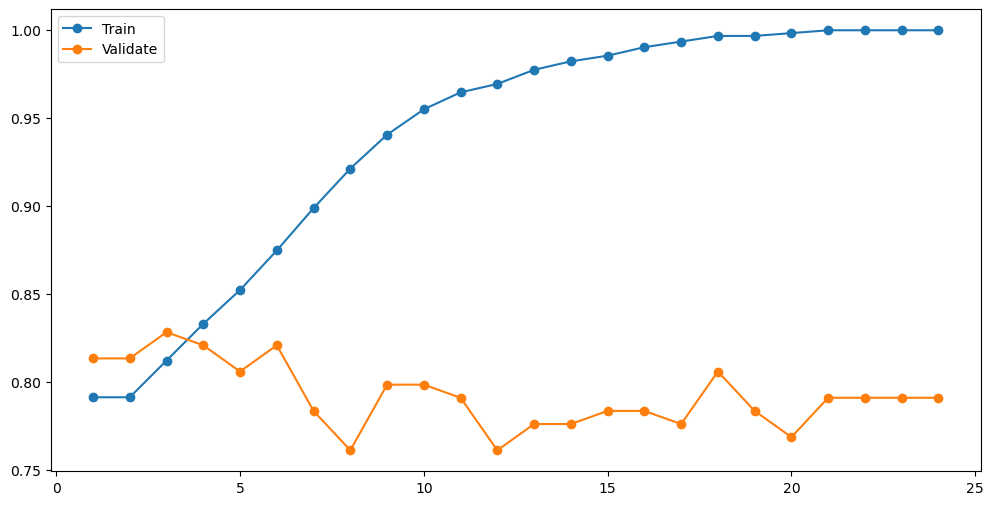

In [43]:
plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label='Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label='Validate')
plt.legend()
plt.show()


5. Run through steps 2-4 using a different max_depth value.

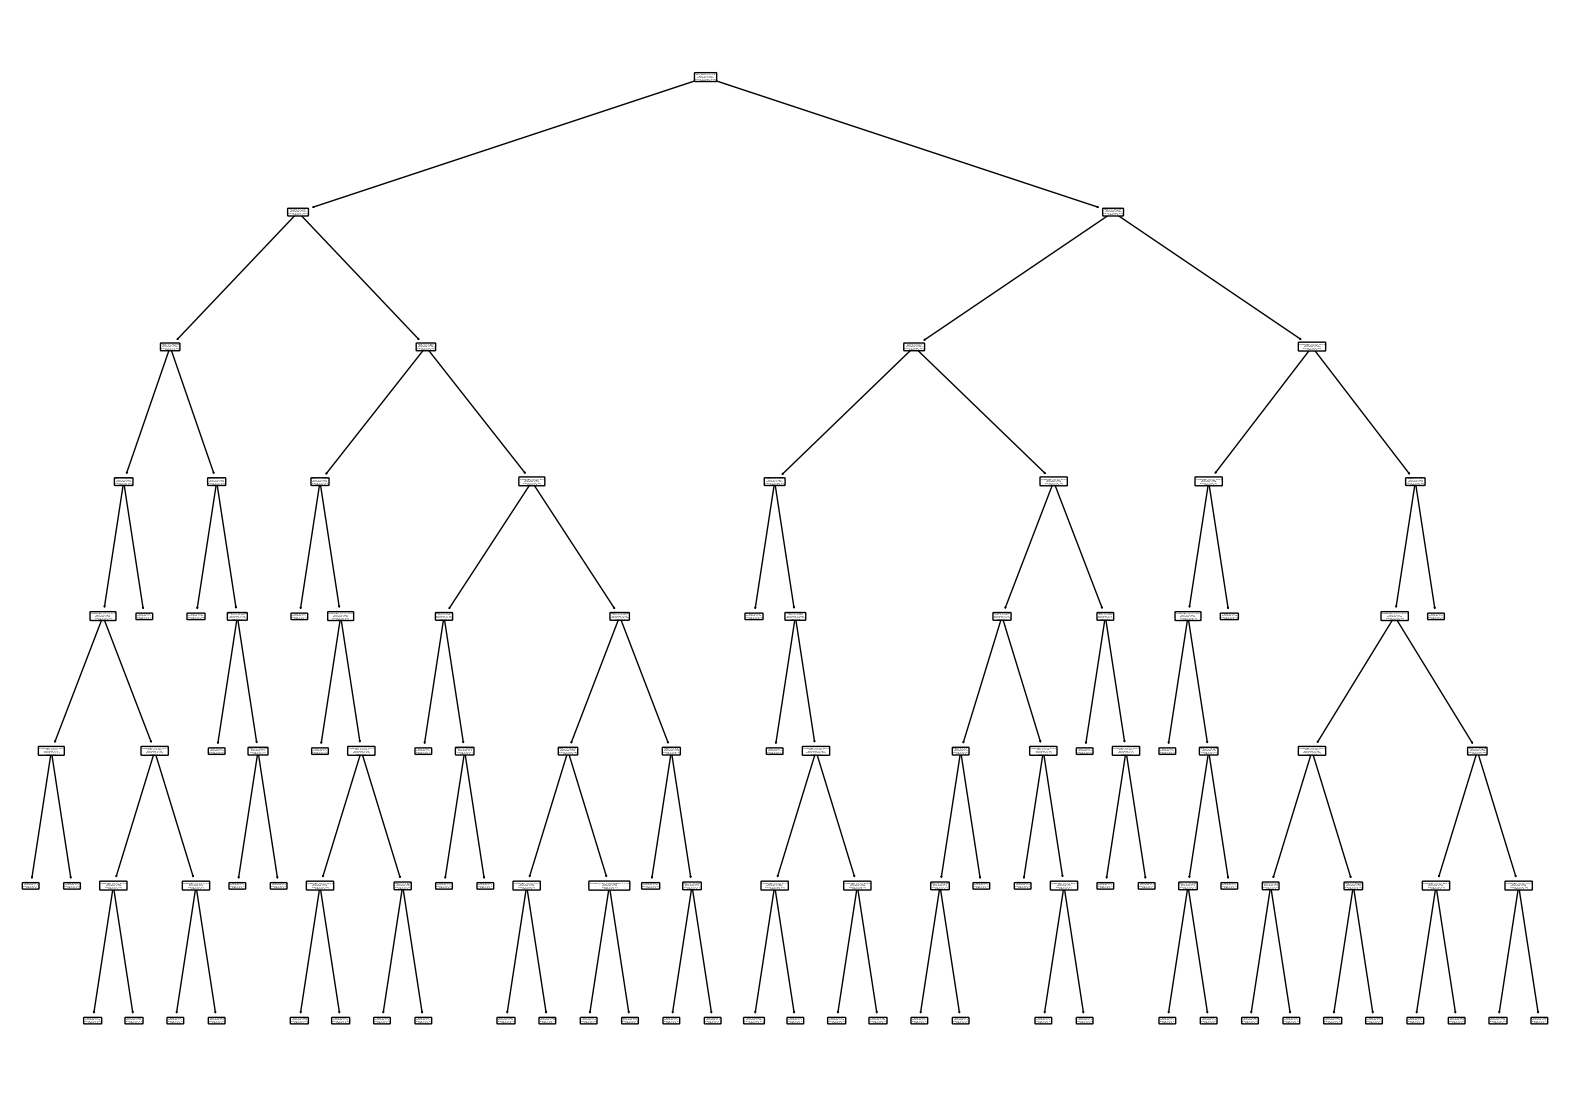

In [23]:
seed = 42
clf = DecisionTreeClassifier(max_depth=7, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 14))

plot_tree(clf, feature_names=X_train.columns, class_names=np.array(clf.classes_).astype('str').tolist(), rounded=True)

plt.show()

6. Which model performs better on your in-sample data?

- The first model performs better.

7. Which model performs best on your out-of-sample data, the validate set?

1. Work through these same exercises using the Telco dataset.

In [57]:
def get_connection(db, username=env.username, host=env.host, password=env.password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

def get_telco():
    my_query="SELECT * FROM customers"
    telco = pd.read_sql(my_query, get_connection('telco_churn'))
    return telco

telco = get_telco()
telco.head(2)


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No


In [58]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [73]:
def prep_telco(telco):
    
    telco = telco.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])
    telco['gender_encoded'] = telco.gender.map({'Female': 1, 'Male': 0})
    telco['partner_encoded'] = telco.partner.map({'Yes': 1, 'No': 0})
    telco['dependents_encoded'] = telco.dependents.map({'Yes': 1, 'No': 0})
    telco['phone_service_encoded'] = telco.phone_service.map({'Yes': 1, 'No': 0})
    telco['paperless_billing_encoded'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
    telco['churn_encoded'] = telco.churn.map({'Yes': 1, 'No': 0})
    dummy_df = pd.get_dummies(telco[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                            ]],
                              drop_first=True)
    telco.dropna()
    telco = pd.concat( [telco, dummy_df], axis=1 )
    
    return telco

In [74]:
telco = prep_telco(telco)

KeyError: "['internet_service_type_id', 'contract_type_id', 'payment_type_id'] not found in axis"

In [75]:
def train_val_test(df, target, seed=42):
    
    train, val_test = train_test_split(df, train_size=0.7, random_state=seed, stratify=df[target])
    
    val, test = train_test_split(val_test, train_size=0.5, random_state=seed, stratify=val_test[target])
    
    return train, val, test

In [76]:
train, val, test = train_val_test(telco, 'churn')
train.shape, val.shape, test.shape

((4930, 38), (1056, 38), (1057, 38))

In [77]:
X_train = train.drop(columns=['churn'])
y_train = train['churn']

X_val = val.drop(columns=['churn'])
y_val = val['churn']

X_test = test.drop(columns=['churn'])
y_test = test['churn']

In [78]:
y_train.value_counts()

No     3622
Yes    1308
Name: churn, dtype: int64

In [79]:
seed = 42
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 5609 to 5679
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4930 non-null   object 
 1   gender                                 4930 non-null   object 
 2   senior_citizen                         4930 non-null   int64  
 3   partner                                4930 non-null   object 
 4   dependents                             4930 non-null   object 
 5   tenure                                 4930 non-null   int64  
 6   phone_service                          4930 non-null   object 
 7   multiple_lines                         4930 non-null   object 
 8   online_security                        4930 non-null   object 
 9   online_backup                          4930 non-null   object 
 10  device_protection                      4930 non-null   object 
 11  t

In [80]:
clf.fit(X_train, y_train)

ValueError: could not convert string to float: '7901-HXJVA'

In [ ]:
plt.figure(figsize=(20, 14))

plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, rounded=True)

plt.show()

In [ ]:
val_preds = clf.predict(X_val)

In [ ]:
print(classification_report(y_val, val_preds))

2. Experiment with this model on other datasets with a higher number of output classes.